# Deutsch's Algorithm

"Deutsch's algorithm was the first algorithm that demonstrated a quantum advantage: specifically a reduction in query complexity compared to the classical case. The Deutsch-Jozsa algorithm generalises Deutsch's algorithm, and reveals the possibility of exponential speed-ups using quantum computers." [[1]](https://www.cl.cam.ac.uk/teaching/1920/QuantComp/Quantum_Computing_Lecture_7.pdf)

# What is the Deutsch Algorithm?

The Deutsch Algorithm is a quantum computing algorithm proposed by David Deutsch. It was the first algorithm to demonstrate a clear quantum speedup over classical computing methods.

The algorithm solves a specific problem called the Deutsch problem: Given a black box function (also known as an oracle) that takes a single bit as input and returns a single bit as output, determine whether the function is constant (returns the same output for both inputs 0 and 1) or balanced (returns different outputs for inputs 0 and 1).

Classically, this problem requires two queries to the function in the worst-case scenario. However, the Deutsch Algorithm can solve it with just one query using the principles of quantum superposition and interference, demonstrating the potential power of quantum computing.

Using the Deutsch's approach, it is possible to determine if a given Boolean function is constant or balanced. Consider a function that takes input values of 0 and 1, and outputs values of 0 or 1. The function is considered constant only if all outputs are 0 or all outputs are 1. When exactly half of the inputs are zeroes and exactly half of the inputs are ones, we refer to the function as balanced. [[2]](https://www.classiq.io/insights/the-deutsch-jozsa-algorithm-explained)

# How does the Deutsch Algorthm work?

The Deutsch Algorithm works by using the principles of quantum superposition and interference. Here's a step-by-step explanation:

1. **Initialization**: Start with two qubits. The first qubit is initialized to |0⟩ and the second qubit (the ancilla qubit) to |1⟩.

2. **Superposition**: Apply a Hadamard gate to both qubits. This puts both qubits into a state of superposition, meaning they are in a combination of all possible states.

3. **Oracle**: Apply the oracle function. This is a black box operation that encodes the function we're trying to determine is either constant or balanced. The oracle is designed such that if the function is constant, it leaves the state of the qubits unchanged, and if the function is balanced, it flips the sign of the second qubit.

4. **Interference**: Apply a Hadamard gate again to the first qubit. This uses the principle of quantum interference to combine the probabilities of the quantum states.

5. **Measurement**: Measure the first qubit. If the function is constant, the measurement will always yield 0. If the function is balanced, the measurement will always yield 1.

This algorithm demonstrates the power of quantum computing, as it can solve the Deutsch problem with just one query to the function, whereas a classical computer would need two queries in the worst-case scenario.

Firstly, quantum registers and input states are prepared. In the second step, the qubits are organized into the Hadamard Basis. This means that each qubit has a 50% chance of being 0 and a 50% chance of being 1. The third step is the oracle, which encodes the function that determines whether the outputs are constant or balanced via quantum entanglement. The fourth step returns the qubits to the measurement basis in order to find the answer. In the last step, the qubits are measured to obtain the solution. [[3]](https://www.classiq.io/insights/the-deutsch-jozsa-algorithm-explained)

The various ways this is done vary little between the first and third steps, the main difference being the implementation of the oracle. One of the most common implementations for the oracle uses a CX gate to initialize a second quantum register with a single ancilla qubit, also referred to as a "work qubit." Normal initialization for qubits is 0; however, the ancilla qubit in this case is set to 1. The oracle then uses a process called phase kickback to assess whether the function is constant or balanced. If the function is balanced, phase kickback will add a negative phase to half of the quantum states. [[4]](https://www.classiq.io/insights/the-deutsch-jozsa-algorithm-explained)

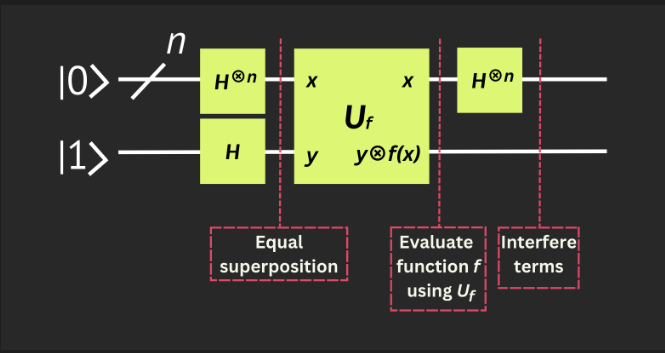

In [2]:
from IPython.display import Image

image_path = "C:\Emerging Technology\Images\Deutsch.png"

Image(filename=image_path)

# Why is the Deutsch-Jozsa algorithm so important?

Three factors make the Deutsch-Jozsa algorithm, which was found in 1992, noteworthy. First of all, it was the first quantum method to distinguish between a problem's quantum and classical difficulties. It was the first quantum algorithm to show a situation in which a quantum computer can outperform a classical one, even if it was not the first to predict a possible speedup. Secondly, the Deutsch-Jozsa technique emphasizes the usefulness of using negative amplitudes, something that is not possible in classical computing. Thirdly, the algorithm served as a prototype for far more important quantum algorithms.

In conclusion, the Deutsch-Jozsa algorithm played an important role in the evolution of quantum algorithms and their history. It came up after Deutsch's problem was identified and paved the way for the development of later algorithms like the Bernstein-Vazirani algorithm. The main difference between the 1985 Deutsch problem and the Deutsch-Jozsa algorithm is that the former is limited to functions with a single input bit. Later, Richard Jozsa and David Deutsch worked together to develop the Deutsch-Jozsa method, which extended the technique to include functions with multiple input bits. David Deutsch is credited with discovering Deutsch's problem. This is a succinct description of the Deutsch-Jozsa algorithm, but when it was first discovered, it showed how quantum computers may potentially solve some tasks faster than classical ones. 

# Building a quantum circuit using Qiskit.

In [6]:
from qiskit import QuantumCircuit
import numpy as np


def dj_function(num_qubits):
    """
    Create a random Deutsch-Jozsa function.
    """

    qc = QuantumCircuit(num_qubits + 1)
    if np.random.randint(0, 2):
        # Flip output qubit with 50% chance
        qc.x(num_qubits)
    if np.random.randint(0, 2):
        # return constant circuit with 50% chance
        return qc

    # next, choose half the possible input states
    on_states = np.random.choice(
        range(2**num_qubits),  # numbers to sample from
        2**num_qubits // 2,  # number of samples
        replace=False,  # makes sure states are only sampled once
    )

    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                qc.x(qubit)
        return qc

    for state in on_states:
        qc.barrier()  # Barriers are added to help visualize how the functions are created. They can safely be removed.
        qc = add_cx(qc, f"{state:0b}")
        qc.mct(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")

    qc.barrier()

    return qc

dj_function(3).draw()

def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in the Deutsch-Jozsa algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

def dj_algorithm(function):
    """
    Run the Deutsch-Jozsa algorithm on the given function.
    """
    compiled_circuit = compile_circuit(function)
    # ... rest of the algorithm implementation


f = dj_function(3)
display(f.draw())
dj_algorithm(f)

░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░                 ░ ┌───┐     »
q_0: ──────░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■──»
           ░ └───┘  │  └───┘ ░ ├───┤  │  ├───┤ ░        │        ░ └───┘  │  »
q_1: ──────░────────■────────░─┤ X ├──■──┤ X ├─░────────■────────░────────■──»
           ░ ┌───┐  │  ┌───┐ ░ ├───┤  │  ├───┤ ░ ┌───┐  │  ┌───┐ ░        │  »
q_2: ──────░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░────────■──»
     ┌───┐ ░ └───┘┌─┴─┐└───┘ ░ └───┘┌─┴─┐└───┘ ░ └───┘┌─┴─┐└───┘ ░      ┌─┴─┐»
q_3: ┤ X ├─░──────┤ X ├──────░──────┤ X ├──────░──────┤ X ├──────░──────┤ X ├»
     └───┘ ░      └───┘      ░      └───┘      ░      └───┘      ░      └───┘»
«     ┌───┐ ░ 
«q_0: ┤ X ├─░─
«     └───┘ ░ 
«q_1: ──────░─
«           ░ 
«q_2: ──────░─
«           ░ 
«q_3: ──────░─
«           ░

The Deutsch-Jozsa algorithm is a deterministic quantum algorithm that solves a specific problem much faster than classical algorithms. The problem is to determine whether a given function is constant or balanced (returns half 0s and half 1s for all possible inputs).

The `dj_function` function creates a random Deutsch-Jozsa function. It starts by creating a quantum circuit with `num_qubits + 1` qubits. The extra qubit is the output qubit. With a 50% chance, it flips the output qubit. With another 50% chance, it returns a constant circuit. If it doesn't return at this point, it creates a balanced function. It randomly selects half of the possible input states and for each state, it applies a series of gates to the circuit to ensure that the function returns 1 for this input state.

The `add_cx` function is a helper function used in `dj_function`. It takes a quantum circuit and a binary string as input. For each bit in the binary string, if the bit is 1, it applies an X gate (bit flip) to the corresponding qubit in the circuit.

The `compile_circuit` function takes a Deutsch-Jozsa function and compiles it into a circuit that can be used to run the Deutsch-Jozsa algorithm. It starts by creating a new quantum circuit with `n + 1` qubits and `n` classical bits, where `n` is the number of input qubits in the function. It then applies an X gate to the output qubit and a Hadamard gate to all qubits to put them into a superposition of states. It adds the function to the circuit and applies another round of Hadamard gates to the input qubits. Finally, it measures the input qubits and stores the results in the classical bits.

The `dj_algorithm` function runs the Deutsch-Jozsa algorithm on a given function. It compiles the function into a circuit and then the rest of the algorithm implementation would follow, which is not shown in the provided code. [[5]](https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#the-deutsch-jozsa-problem)